In [1]:
def read_token_file(path):
    sub_path = path+"_token_sub.txt"
    doc_path = path+"_token_doc.txt"    
    reader_sub = open(sub_path)
    reader_doc = open(doc_path)
    
    content = []
    while True:
        doc_token = reader_doc.readline().replace("\n","")
        sub_token = reader_sub.readline().replace("\n","")
        if not doc_token:
            reader_doc.close()
            reader_sub.close()
            break

        doc = [tokens.split("<tokesep>") for tokens in doc_token.split("<sentsep>")]
        sub = [tokens.split("<tokesep>") for tokens in sub_token.split("<sentsep>")]
        content.append({"doc":doc, "sub":sub})
        
    reader_doc.close()
    reader_sub.close()
    return content

In [2]:
dev = read_token_file("./data/token/dev")
test = read_token_file("./data/token/test")
train = read_token_file("./data/token/train")

In [3]:
full = train+test+dev

In [4]:
def dataset_stat(dataset):
        
    hist = {
        "token": {"sub":[], "doc":[]},
        "sents": {"sub":[], "doc":[]},
        "topse": {"sub":[], "doc":[]}    #every token per sentences
    }
    
    count = {
        "sents": {"sub":0, "doc":0}
    }

    for data in dataset:
        doc = data["doc"]
        sub = data["sub"]
        
        len_sent_doc = len(doc)
        len_sent_sub = len(sub)
        
        #count sentences
        count["sents"]["doc"] += len_sent_doc 
        count["sents"]["sub"] += len_sent_sub
            
        # token per senteneces
        topse_doc = 0
        topse_sub = 0
        for sent in doc:
            topse_doc += len(sent)
        topse_doc /= len(doc)
        for sent in sub:
            topse_sub += len(sent)
        topse_sub /= len(sub)

        # hist token per sentences
        hist["topse"]["doc"].append(topse_doc)
        hist["topse"]["sub"].append(topse_sub)
        
        hist["sents"]["doc"].append(len_sent_doc)
        hist["sents"]["sub"].append(len_sent_sub)

        hist["token"]["doc"].append(sum([len(sent) for sent in doc])) 
        hist["token"]["sub"].append(sum([len(sent) for sent in sub]))      
        
    return hist, count

In [5]:
hist, count = dataset_stat(full)

In [6]:
import matplotlib.pyplot as plt
def plot_hist(data, bins, title, xlabel, ylabel):
    print("Range:", "({}, {})".format(min(data), max(data)))
    print("  Avg:", sum(data)/len(data))
    plt.hist(data, bins=bins, histtype="bar", rwidth=0.9, alpha=0.6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [14]:
import matplotlib.pyplot as plt
def plot_hist(data, bins, title, xlabel, ylabel):
    plt.hist(data, bins=bins, histtype="bar", rwidth=0.9, alpha=0.6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def plot_box(data, title="", xlabel="", ylabel=""):
    print("Range:", "({}, {})".format(min(data), max(data)))
    print("  Avg:", sum(data)/len(data))
    plt.boxplot(data, vert=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def plot_stat(data, bins=None, describe=""):
    plot_box(data, "Box: "+describe, "count", describe)
    plot_hist(data, bins, "Hist: "+describe, describe, "count")

Range: (1, 34)
  Avg: 4.587258223145011


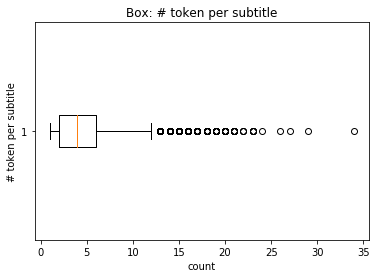

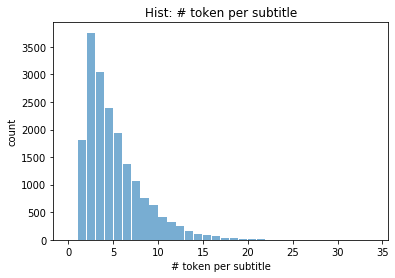

In [15]:
plot_stat(hist["token"]["sub"], range(0, 35, 1), "# token per subtitle")

Range: (28, 4428)
  Avg: 144.90618511638073


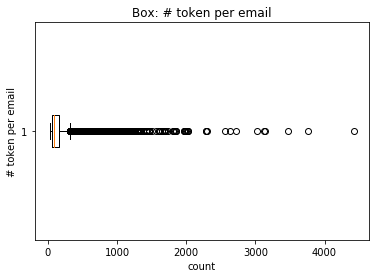

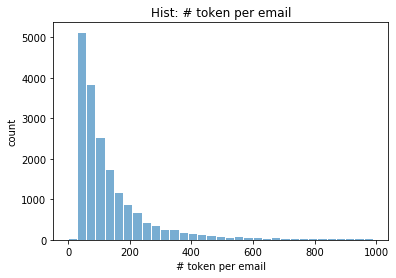

In [16]:
plot_stat(hist["token"]["doc"], range(0, 1000, 30), "# token per email")

Range: (1, 4)
  Avg: 1.08862419407715


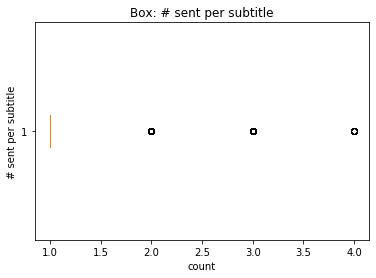

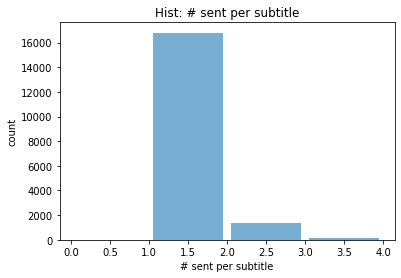

In [18]:
plot_stat(hist["sents"]["sub"], range(0, 5, 1), "# sent per subtitle")

Range: (1, 241)
  Avg: 7.883018249371653


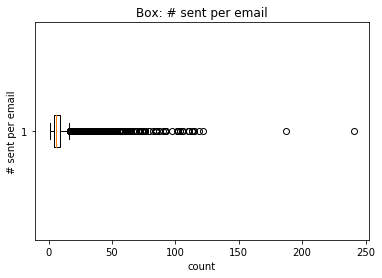

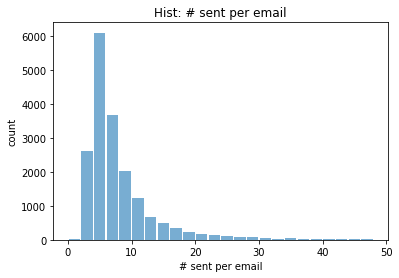

In [19]:
plot_stat(hist["sents"]["doc"], range(0, 50, 2), "# sent per email")

Range: (1.0, 34.0)
  Avg: 4.241439915491932


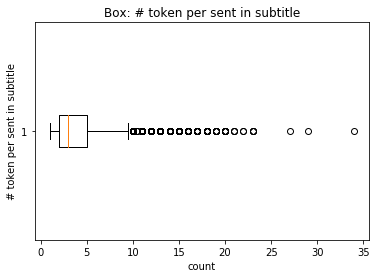

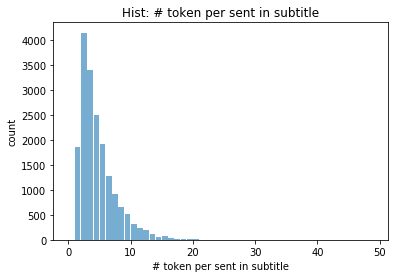

In [20]:
plot_stat(hist["topse"]["sub"], range(0, 50, 1), "# token per sent in subtitle")

Range: (5.0, 366.0)
  Avg: 17.71094474208025


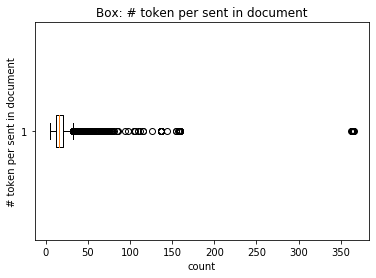

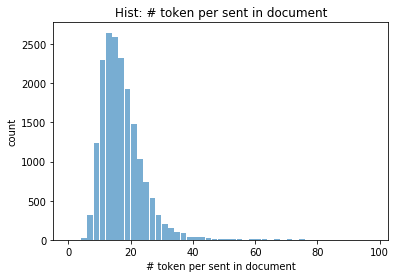

In [21]:
plot_stat(hist["topse"]["doc"], range(0, 100, 2), "# token per sent in document")

In [22]:
def cooccurrence(dataset):
    coos = []
    for data in dataset:
        doc = "<sep>".join(["<sep>".join(sent) for sent in data["doc"]]).split("<sep>")
        sub = "<sep>".join(["<sep>".join(sent) for sent in data["sub"]]).split("<sep>")

        coo = 0
        for token in sub:
            if token not in doc:
                coo += 1
        coo = coo/len(sub)
        coos.append(coo)
    return coos        

In [23]:
coo = cooccurrence(full)

Range: (0.0, 1.0)
  Avg: 0.5881849898790142


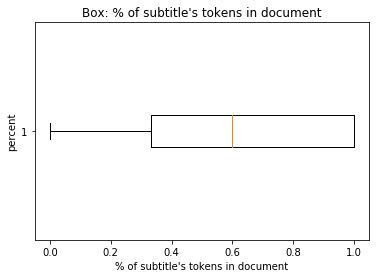

In [30]:
plot_box(data, "Box: % of subtitle's tokens in document", "% of subtitle's tokens in document","percent")

Range: (0.0, 1.0)
  Avg: 0.5881849898790142


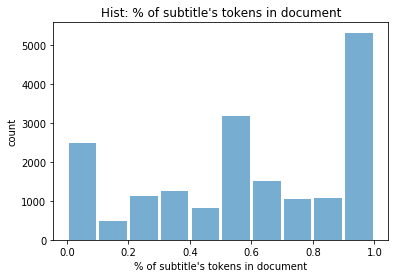

In [24]:
data = coo
title = "Hist: % of subtitle's tokens in document"
xlabel = "% of subtitle's tokens in document"
ylabel = "count"

print("Range:", "({}, {})".format(min(data), max(data)))
print("  Avg:", sum(data)/len(data))
plt.hist(data, histtype="bar", rwidth=0.9, alpha=0.6)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()